<a href="https://colab.research.google.com/github/Priya7084/Data-Science---Insurance-Prediction-Project-/blob/main/Internship_Task_2_(Insurance_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('insurance.csv')

In [ ]:
# Converting Categorical values to Numerical
label_encoder = LabelEncoder()
categorical_columns = ['sex', 'smoker', 'region']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

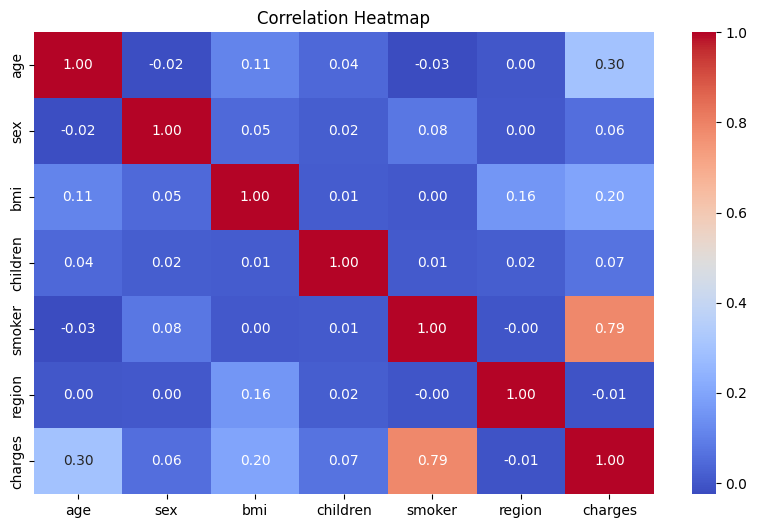

In [ ]:
# Plotting Heatmap to see dependency of Dependent value on Independent features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

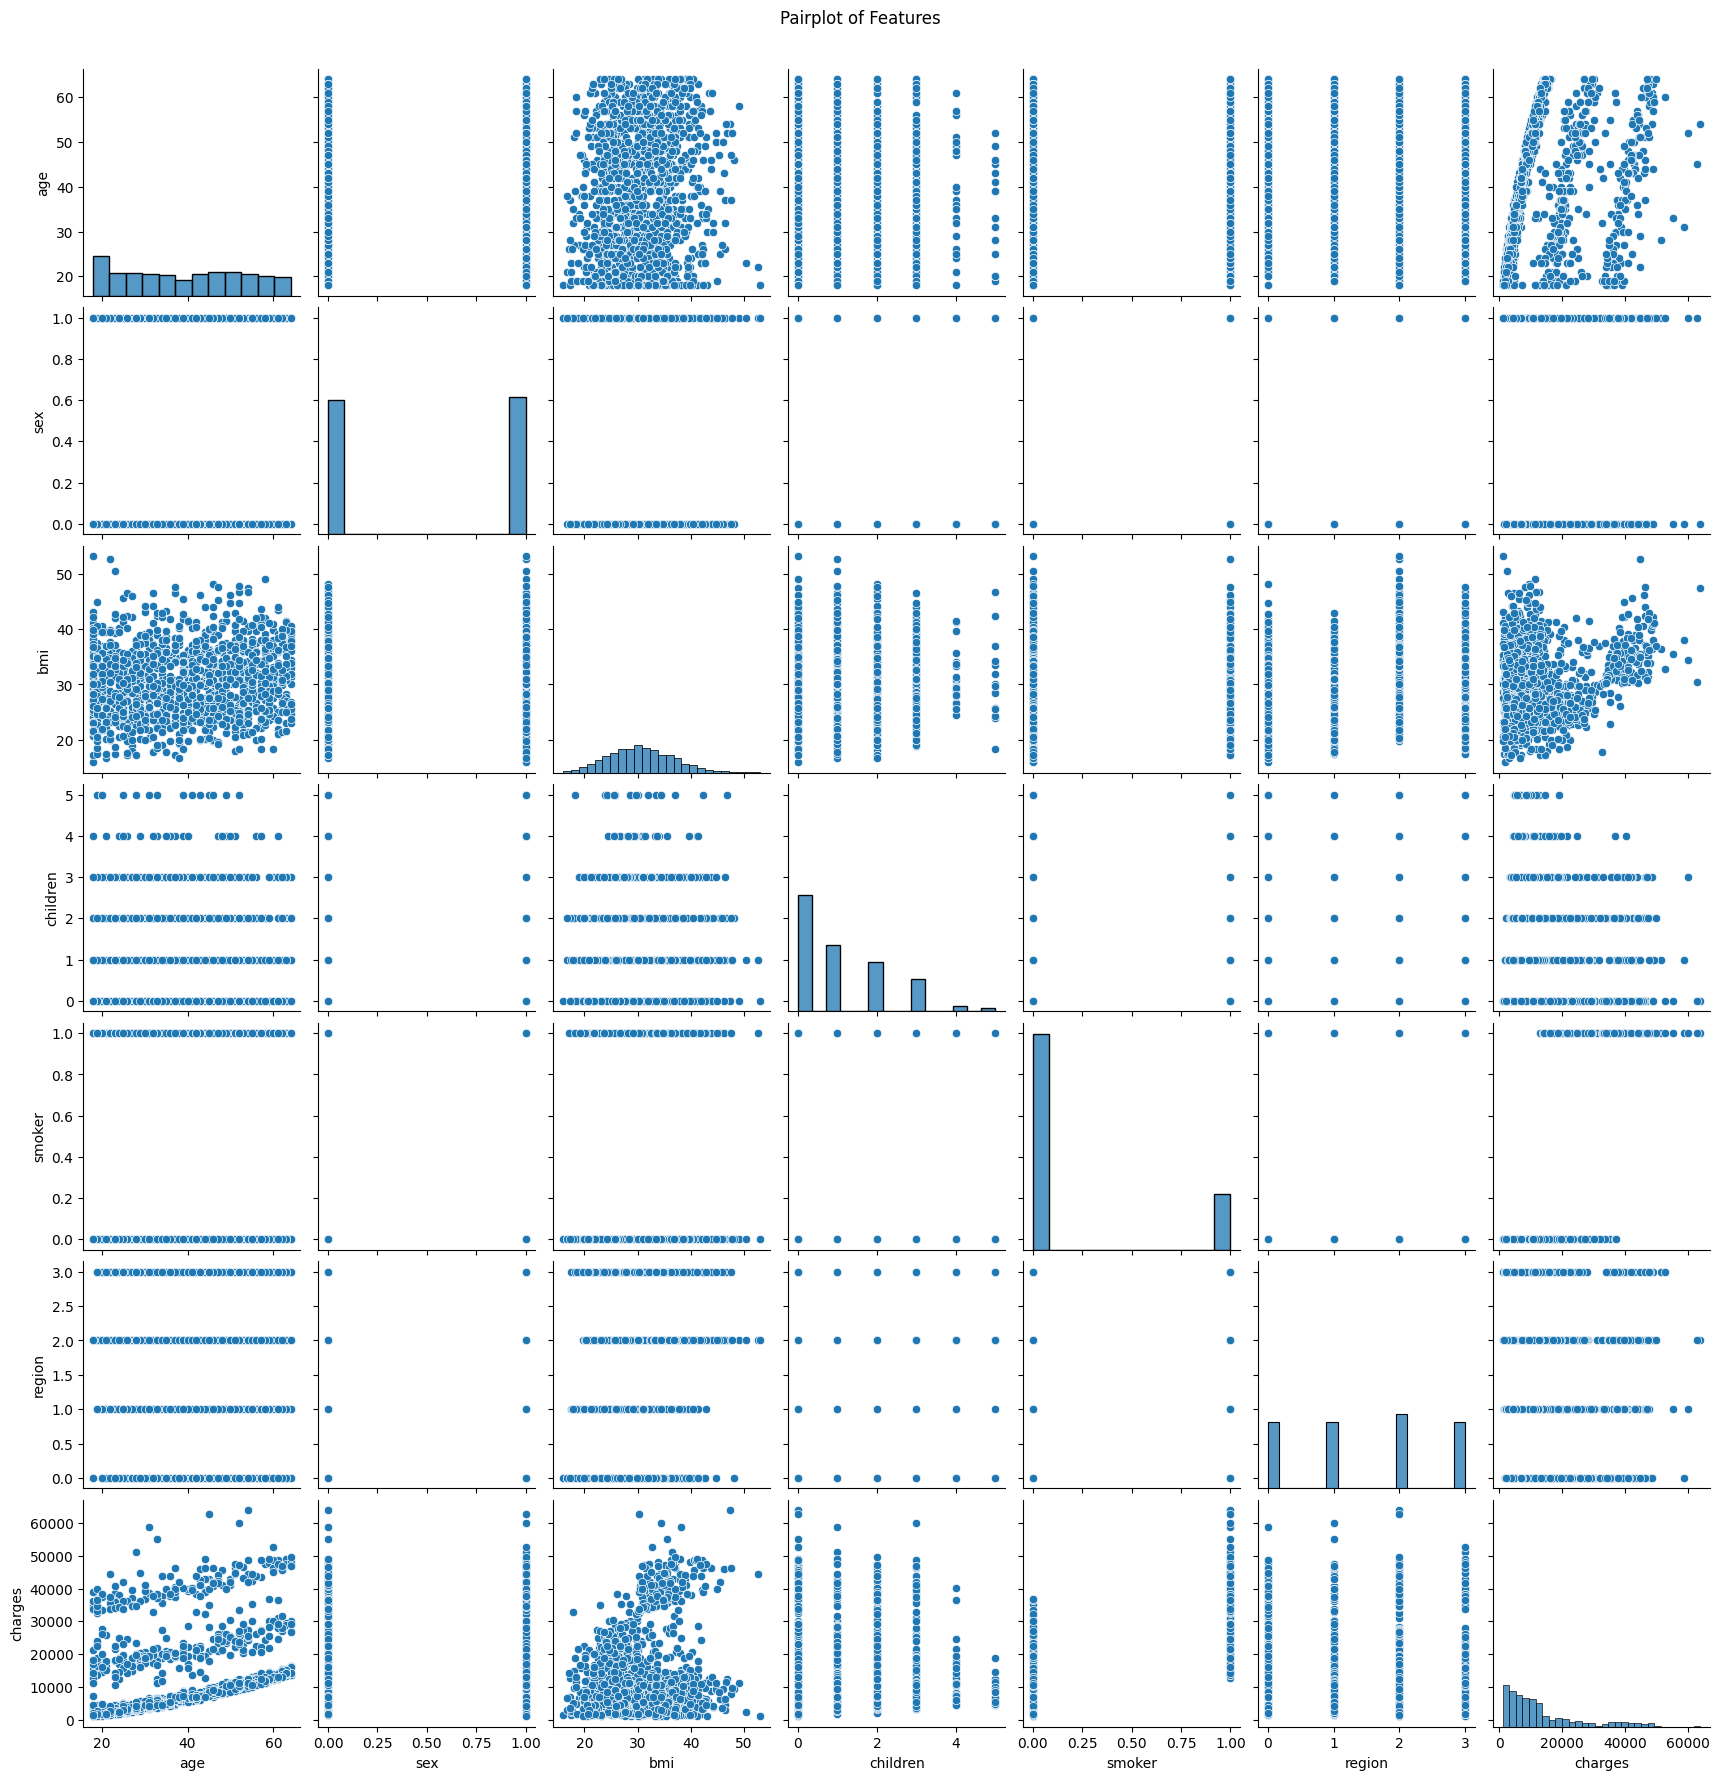

In [ ]:
# Data Visualization (Plots of feature vs feature)
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [ ]:
# Plotting Skew and Kurtosis
for column in df.columns:
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()
    print(f'{column} - Skewness: {skewness}, Kurtosis: {kurtosis}')

age - Skewness: 0.05567251565299186, Kurtosis: -1.2450876526418673
sex - Skewness: -0.02095139743334541, Kurtosis: -2.0025566364991754
bmi - Skewness: 0.2840471105987448, Kurtosis: -0.05073153135467834
children - Skewness: 0.9383804401702414, Kurtosis: 0.2024541467168901
smoker - Skewness: 1.4647661601953743, Kurtosis: 0.1457555390520402
region - Skewness: -0.038100508026419524, Kurtosis: -1.3277019498126457
charges - Skewness: 1.5158796580240388, Kurtosis: 1.6062986532967907


In [ ]:
# Data Preparation
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Prediction using Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)


In [ ]:
# Prediction using SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

In [ ]:
# Prediction using Ridge Regressor
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [ ]:
# Prediction using Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)


In [ ]:
# Performing Hyperparameter Tuning for the models
param_grid_svr = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid_svr = GridSearchCV(SVR(), param_grid_svr, refit=True, verbose=2)
grid_svr.fit(X_train, y_train)
grid_svr_pred = grid_svr.predict(X_test)
grid_svr_mse = mean_squared_error(y_test, grid_svr_pred)
grid_svr_r2 = r2_score(y_test, grid_svr_pred)

param_grid_rf = {'n_estimators': [10, 50, 100], 'max_features': ['auto', 'sqrt']}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, refit=True, verbose=2)
grid_rf.fit(X_train, y_train)
grid_rf_pred = grid_rf.predict(X_test)
grid_rf_mse = mean_squared_error(y_test, grid_rf_pred)
grid_rf_r2 = r2_score(y_test, grid_rf_pred)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.1s
[CV] END ..................................C=0.1,

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END .................max_features=auto, n_estimators=10; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END .................max_features=auto, n_estimators=10; total time=   0.3s
[CV] END .................max_features=auto, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END .................max_features=auto, n_estimators=10; total time=   0.1s
[CV] END .................max_features=auto, n_estimators=10; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END .................max_features=auto, n_estimators=50; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END .................max_features=auto, n_estimators=50; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END .................max_features=auto, n_estimators=50; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END .................max_features=auto, n_estimators=50; total time=   0.2s
[CV] END .................max_features=auto, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=100; total time=   0.3s
[CV] END .................max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ................max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ................max

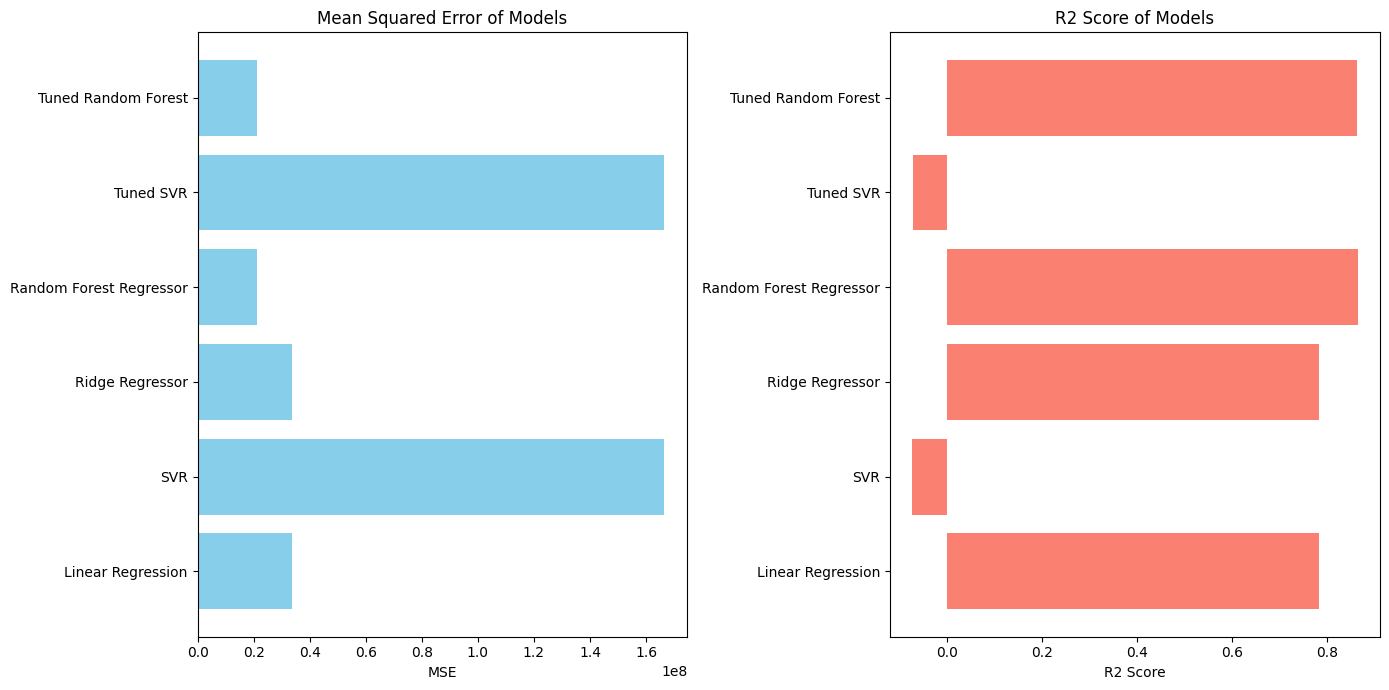

In [ ]:
# Plotting Graph for all Models to compare performance
models = ['Linear Regression', 'SVR', 'Ridge Regressor', 'Random Forest Regressor', 'Tuned SVR', 'Tuned Random Forest']
mse = [lr_mse, svr_mse, ridge_mse, rf_mse, grid_svr_mse, grid_rf_mse]
r2 = [lr_r2, svr_r2, ridge_r2, rf_r2, grid_svr_r2, grid_rf_r2]

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.barh(models, mse, color='skyblue')
plt.xlabel('MSE')
plt.title('Mean Squared Error of Models')

plt.subplot(1, 2, 2)
plt.barh(models, r2, color='salmon')
plt.xlabel('R2 Score')
plt.title('R2 Score of Models')

plt.tight_layout()
plt.show()